In [1]:
import sys
import numpy as np
if "../" not in sys.path:
  sys.path.append("../") 
import os
os.chdir("..") 
from envs.data_handler import DataHandler
import envs.data_utils as du

path = 'data/prepared_data/'

# Non-stationary data generation

Create non-stationary data using the AR Model with a Ornstein–Uhlenbeck procedure model. A series value $x$ at time point $t$ for a <component,failure> group is calculated by:
\begin{align}
x_{t} = x_{t-1} + 0.1 * (\mu * x_{t-1}) + rand(\mathcal{N}))
\end{align}
where:

\begin{align}
&\mu \text{ as the mean of <component,failure>}\\
&rand(\mathcal{N}) \text{ is a random value from a normal distribution}\\
&\text{with the standard deviation } \frac{\sigma^{2}}{2} \text{where}\\
&\sigma \text{ is the standard deviation of the <component,failure>.}
\end{align}


100%|██████████| 915/915 [12:34<00:00,  1.21it/s]


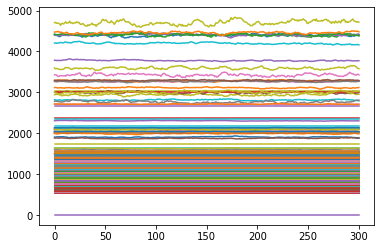

In [2]:
dh = DataHandler(data_generation='LinearShifted', take_component_id=True, transformation='raw')
non_stationary_data_ARCH = du.create_non_stationary_data('ARol', dh.data, N=300)
non_stationary_data_ARCH.to_csv(path +'ARol_Id_raw.csv')

Create non-stationary data using the GARCH model. A series value $x$ at time point $t$ for a <component,failure> group is calculated by:
\begin{align}
x_{t} = p_{t} * \sqrt{ 0.1 + (0.3 * p_{t-1}^2) + (0.2 * x_{t-1}^2)}
\end{align}

where is $p$ are random samples from a normal distribution with mean $\mu = 0$ and standard deviation $\frac{\sigma^{2}}{2}$ of the <component,failure> group and size $s = 1000$.

  6%|▋         | 58/915 [00:25<06:35,  2.17it/s]/Users/rachel/IdeaProjects/rl-4-self-repair/envs/data_utils.py:98: RuntimeWarning: overflow encountered in double_scalars
  series.append(variance[t] * np.sqrt(alpha[0] + alpha[1] * variance[t-1]**2 + beta * series[t-1]**2))
100%|██████████| 915/915 [21:58<00:00,  1.44s/it]


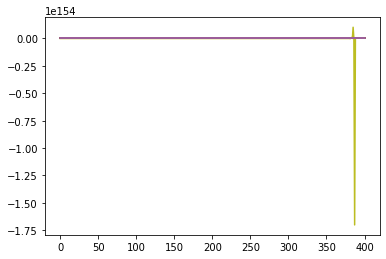

In [2]:
dh = DataHandler(data_generation='LinearShifted', take_component_id=True, transformation='raw')
non_stationary_data_GARCH = du.create_non_stationary_data('GARCH', dh.data, N=300)
non_stationary_data_GARCH.to_csv(path + 'GARCH_Id_raw.csv')

## Ttest

In [5]:
dh = DataHandler(data_generation='ARol', type='raw')
result = du.perform_ttest(dh.data)
print(len(result[result['pvalue']<0.025]), 'of the ', len(result.index) ,' <component, failure> combination pairs are statistical significant')

data/prepared_data/ARCH_Id_sqt.csv
229 of the  914  <component, failure> combination pairs are statistical significant


In [6]:
dh = DataHandler(data_generation='GARCH', type='sqt')
result = du.perform_ttest(dh.data)
print(len(result[result['pvalue']<0.025]), 'of the ', len(result.index) ,' <component, failure> combination pairs are statistical significant')

data/prepared_data/GARCH_Id_sqt.csv
0 of the  914  <component, failure> combination pairs are statistical significant
